## Лабораторная работа №5
### **Выполнила:** ст. группы AIN-2-22, Бекбоева Айтурсун

### Изучение моделей классификации и регрессии

#### **Подключение и изучение датасетов моделей регрессии:**

In [131]:
from sklearn.datasets import load_diabetes, load_linnerud

diabetes_dataset = load_diabetes(as_frame=True)

linnerud_dataset = load_linnerud(as_frame=True)

def display_dataset_info(name, dataset):
    print(f"\n=== {name} Dataset ===")
    print("Keys:", dataset.keys())
    
    print("\nDescription:\n", dataset["DESCR"][:1000] + "\n...")  
    
    print("Feature names:", dataset['feature_names'])
    print("\nData Type:", type(dataset['data']))
    print("Data Shape:", dataset['data'].shape)
    print("First 5 rows of data:\n", dataset['data'].head())  
    
    print("\nTarget Type:", type(dataset['target']))
    print("Target Shape:", dataset['target'].shape)
    print("Target Values (first 5 rows):\n", dataset['target'].head())  


display_dataset_info("Diabetes", diabetes_dataset)
display_dataset_info("Linnerud", linnerud_dataset)



=== Diabetes Dataset ===
Keys: dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

Description:
 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cho

#### **KNeighborsRegressor - Diabetes Dataset**

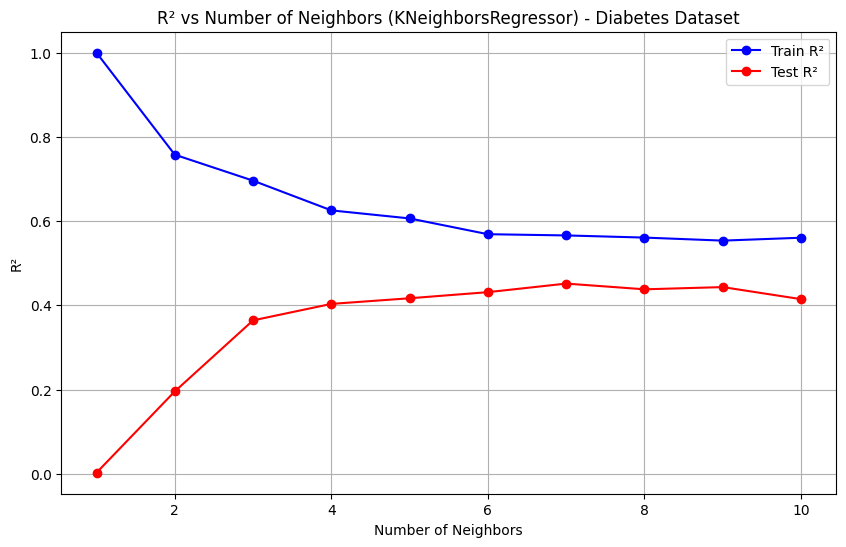

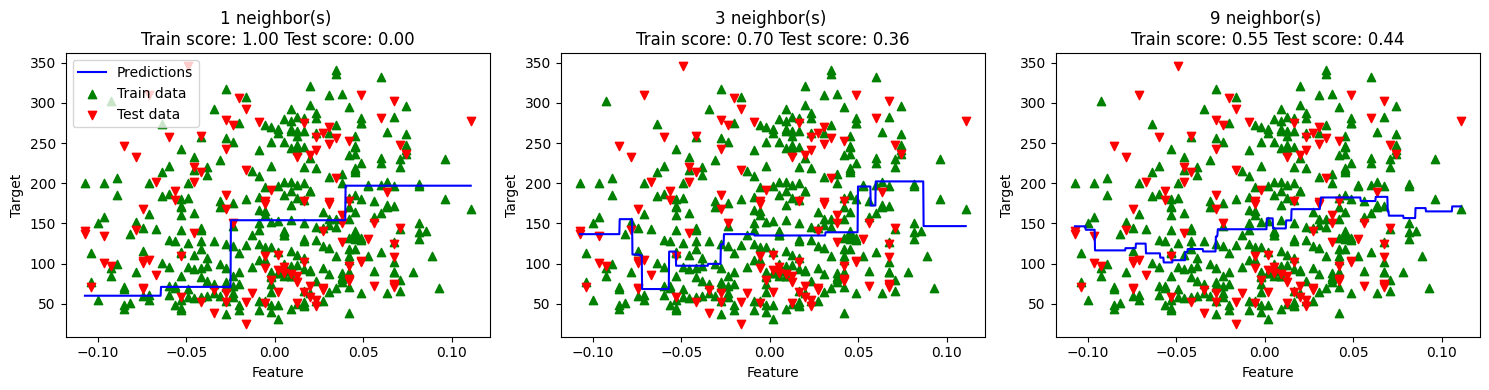

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

diabetes_dataset = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_dataset.data, diabetes_dataset.target, random_state=66)

train_r2 = []
test_r2 = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    train_r2.append(r2_score(y_train, reg.predict(X_train)))
    test_r2.append(r2_score(y_test, reg.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, train_r2, label="Train R²", marker='o', color="blue")
plt.plot(neighbors_settings, test_r2, label="Test R²", marker='o', color="red")
plt.xlabel('Number of Neighbors')
plt.ylabel('R²')
plt.title('R² vs Number of Neighbors (KNeighborsRegressor) - Diabetes Dataset')
plt.legend()
plt.grid(True)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 1000).reshape(-1, 1)
mean_values = np.mean(X_train, axis=0).reshape(1, -1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    X_line = np.repeat(line, X_train.shape[1], axis=1)
    X_line[:, 1:] = mean_values[:, 1:]

    ax.plot(line, reg.predict(X_line), label="Predictions", color='blue')
    ax.scatter(X_train[:, 0], y_train, c='green', marker='^', label="Train data")
    ax.scatter(X_test[:, 0], y_test, c='red', marker='v', label="Test data")
    
    ax.set_title(f"{n_neighbors} neighbor(s) \nTrain score: {reg.score(X_train, y_train):.2f} Test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(loc="best")
plt.tight_layout()
plt.show()


#### **Вывод для KNeighborsRegressor - Diabetes Dataset:**

Для датасета **diabetes** модель **KNeighborsRegressor** показала, что оптимальное количество соседей — около 3–5, при котором достигается лучший баланс между точностью на обучающей и тестовой выборках. При малых значениях `n_neighbors` наблюдается переобучение, а при высоких — потеря точности. Модель подходит для простой интерпретации, но на сложных данных может уступать другим регрессионным методам в устойчивости и точности.

#### **KNeighborsRegressor - Linnerud Dataset**

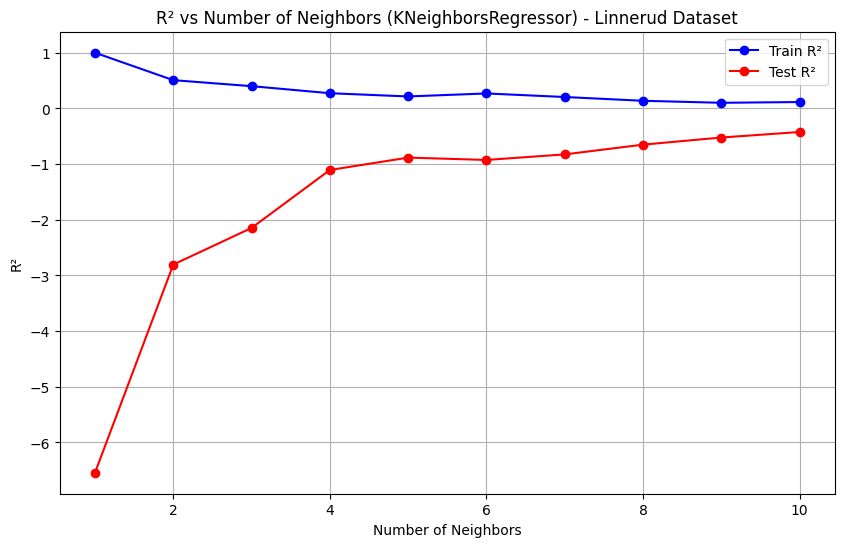

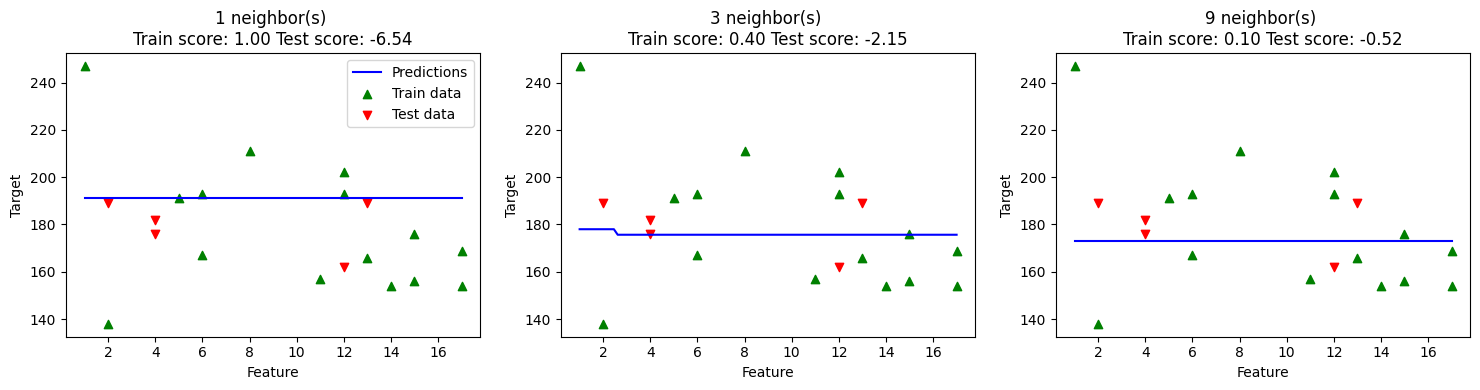

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

linnerud_data = load_linnerud()
X_train, X_test, y_train, y_test = train_test_split(
    linnerud_data.data, linnerud_data.target, random_state=66)

train_r2 = []
test_r2 = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    train_r2.append(r2_score(y_train, reg.predict(X_train)))
    test_r2.append(r2_score(y_test, reg.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, train_r2, label="Train R²", marker='o', color="blue")
plt.plot(neighbors_settings, test_r2, label="Test R²", marker='o', color="red")
plt.xlabel('Number of Neighbors')
plt.ylabel('R²')
plt.title('R² vs Number of Neighbors (KNeighborsRegressor) - Linnerud Dataset')
plt.legend()
plt.grid(True)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100).reshape(-1, 1)
mean_values = np.mean(X_train, axis=0).reshape(1, -1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    X_line = np.repeat(line, X_train.shape[1], axis=1)
    X_line[:, 1:] = mean_values[:, 1:]

    ax.plot(line, reg.predict(X_line)[:, 0], label="Predictions", color='blue')
    ax.scatter(X_train[:, 0], y_train[:, 0], c='green', marker='^', label="Train data")
    ax.scatter(X_test[:, 0], y_test[:, 0], c='red', marker='v', label="Test data")
    
    ax.set_title(f"{n_neighbors} neighbor(s) \nTrain score: {reg.score(X_train, y_train):.2f} Test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(loc="best")
plt.tight_layout()
plt.show()


#### **Вывод для KNeighborsRegressor - Linnerud Dataset:**

Для датасета **Linnerud** модель **KNeighborsRegressor** показала, что оптимальное количество соседей — 3–5, где достигается наилучший баланс между точностью на обучающей и тестовой выборках. При малых значениях `n_neighbors` модель склонна к переобучению, тогда как при высоких — теряет точность из-за избыточного сглаживания. Модель позволяет просто интерпретировать данные, но для сложных зависимостей может потребоваться другой подход для повышения устойчивости и точности.

#### **LinearRegression - Diabetes Dataset**

Intercept: 152.00335421448167
Coefficients: [998.57768914]


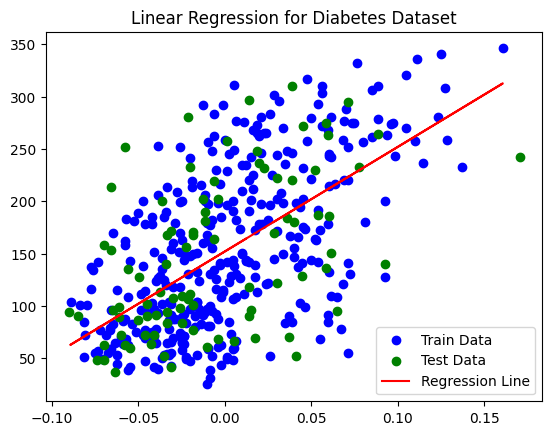

Training MSE: 3854.11265207582
Test MSE: 4061.8259284949268


In [134]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data[:, 2:3], data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f'Intercept: {lr.intercept_}')
print(f'Coefficients: {lr.coef_}')

plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_train_pred, color='red', label='Regression Line')
plt.title('Linear Regression for Diabetes Dataset')
plt.legend()
plt.show()

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')


#### **Вывод для LinearRegression - Diabetes Dataset:**

Для датасета **Diabetes** модель **Linear Regression** показала перехват (Intercept) 152.00 и коэффициент (Coefficients) 998.58. Среднеквадратическая ошибка (MSE) на обучающих данных составила 3854.11, а на тестовых — 4061.83. Это говорит о том, что модель не совсем точная и требует улучшений, возможно, с использованием других методов.

#### **LinearRegression - Linnerud Dataset**

Intercept: 196.08635529843374
Coefficients: [-1.91435022]


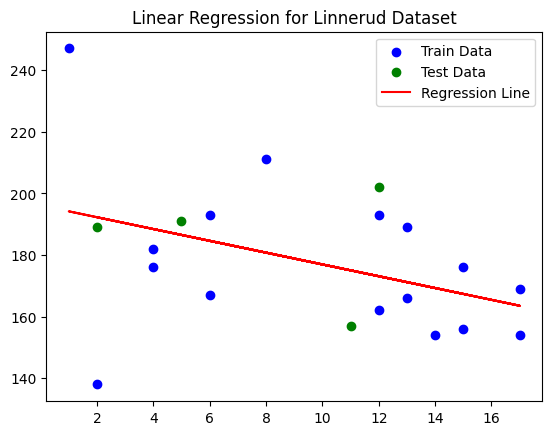

Training MSE: 540.3555100888952
Test MSE: 297.53754573193606


In [135]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_linnerud

data = load_linnerud()
X, y = data.data[:, 0:1], data.target[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f'Intercept: {lr.intercept_}')
print(f'Coefficients: {lr.coef_}')

plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_train_pred, color='red', label='Regression Line')
plt.title('Linear Regression for Linnerud Dataset')
plt.legend()
plt.show()

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')


#### **Вывод для LinearRegression - Linnerud Dataset:**

Для датасета **Linnerud** модель **Linear Regression** показала перехват (Intercept) был 196.09, а коэффициент (Coefficients) -1.91. MSE на обучающих данных составила 540.36, а на тестовых — 297.54. Модель показала неплохие результаты на тестовых данных, но всё ещё можно улучшить точность, возможно, с применением более сложных подходов.

#### **Ridge Regression - Diabetes Dataset**

Alpha: 0.01
Intercept: 152.0251087411459
Coefficients: [986.043813]
Training MSE: 3854.4627640027857
Test MSE: 4048.335197728432

Alpha: 0.1
Intercept: 152.1988187238673
Coefficients: [885.96076171]
Training MSE: 3882.3772919646894
Test MSE: 3967.792420404862

Alpha: 1.0
Intercept: 152.9734033395236
Coefficients: [439.68363588]
Training MSE: 4550.2502424655795
Test MSE: 4196.651787171006

Alpha: 10.0
Intercept: 153.61013776336802
Coefficients: [72.82893357]
Training MSE: 5764.064340996908
Test MSE: 5104.152069735286



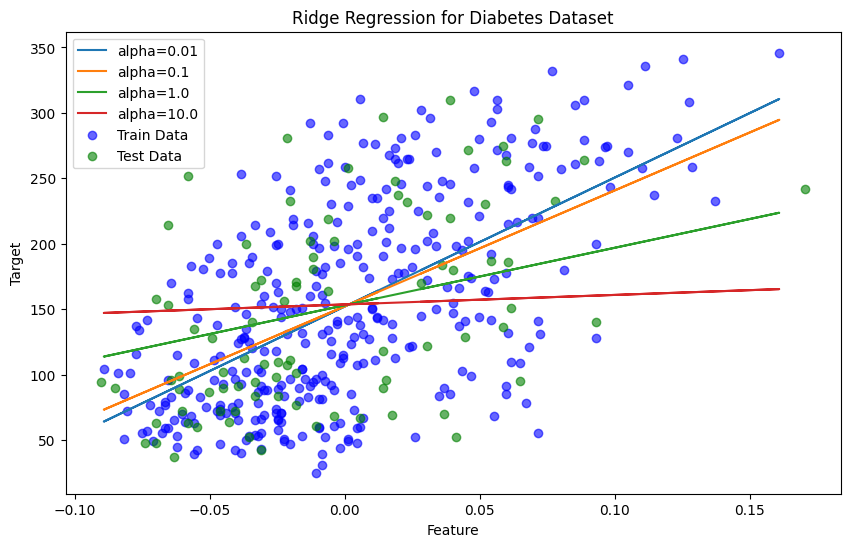

In [136]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data[:, 2:3], data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.01, 0.1, 1.0, 10.0]

plt.figure(figsize=(10, 6))

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    print(f'Alpha: {alpha}')
    print(f'Intercept: {ridge.intercept_}')
    print(f'Coefficients: {ridge.coef_}')
    print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')
    print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}\n')

    plt.plot(X_train, y_train_pred, label=f'alpha={alpha}')

plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.6)
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.6)

plt.title('Ridge Regression for Diabetes Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


#### **Вывод для Ridge Regression - Diabetes Dataset:**

Для датасета **Diabetes** в модели **Ridge Regression** с увеличением значения alpha коэффициенты становились меньше. При alpha = 0.01 ошибка на обучающей выборке составила 3854.46, а на тестовой — 4048.34. При alpha = 0.1 ошибка немного увеличилась на обучающей выборке (3882.38), но тестовая ошибка уменьшилась до 3967.79. При alpha = 1.0 ошибка на обучающем наборе выросла до 4550.25, а на тестовом — до 4196.65. При alpha = 10.0 модель стала более простой, но точность сильно снизилась: 5764.06 на обучающей и 5104.15 на тестовой выборке. Это показывает, что увеличение alpha улучшает обобщающую способность модели, но ухудшает точность на обучающих данных.

#### **Ridge Regression - Linnerud Dataset**

Alpha: 0.01
Intercept: 196.0859258151361
Coefficients: [-1.914307]
Training MSE: 540.3555101406034
Test MSE: 297.53659210041707

Alpha: 0.1
Intercept: 196.08206133792285
Coefficients: [-1.91391812]
Training MSE: 540.3555152576303
Test MSE: 297.52801525090194

Alpha: 1.0
Intercept: 196.04350274531888
Coefficients: [-1.91003801]
Training MSE: 540.3560248688029
Test MSE: 297.44282216901826

Alpha: 10.0
Intercept: 195.6663446943563
Coefficients: [-1.872085]
Training MSE: 540.4049626393369
Test MSE: 296.64633310674225



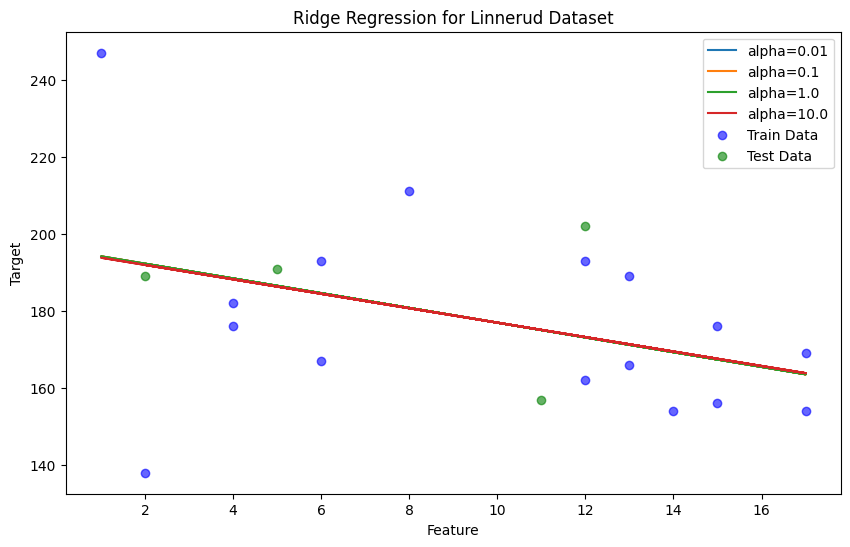

In [137]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_linnerud

data = load_linnerud()
X, y = data.data[:, 0:1], data.target[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.01, 0.1, 1.0, 10.0]

plt.figure(figsize=(10, 6))

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    print(f'Alpha: {alpha}')
    print(f'Intercept: {ridge.intercept_}')
    print(f'Coefficients: {ridge.coef_}')
    print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')
    print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}\n')

    plt.plot(X_train, y_train_pred, label=f'alpha={alpha}')

plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.6)
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.6)

plt.title('Ridge Regression for Linnerud Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


#### **Вывод для Ridge Regression - Linnerud Dataset:**

Для датасета **Linnerud** в модели **Ridge Regression** ошибки почти не изменялись при разных значениях alpha. При alpha = 0.01 ошибка на обучающем наборе была 540.36, а на тестовом — 297.54. При alpha = 0.1 и alpha = 1.0 ошибки остались практически одинаковыми. Даже при alpha = 10.0 ошибки изменились незначительно: 540.40 на обучающем и 296.65 на тестовой выборке. Это говорит о том, что для этого набора данных изменения alpha не сильно влияли на производительность модели.

#### **Lasso Regression - Diabetes Dataset**

Alpha: 0.01
Intercept: 151.3434891207199
Coefficients: [  35.34745133 -231.90666401  551.3032416   341.31346895 -483.56713972
  165.99053164  -25.8348991   216.87580276  566.81500336   49.70247477]
Training MSE: 2877.0810201119007
Test MSE: 2878.559386186607
--------------------------------------------------
Alpha: 0.1
Intercept: 151.57485282893947
Coefficients: [   0.         -152.66477923  552.69777529  303.36515791  -81.36500664
   -0.         -229.25577639    0.          447.91952518   29.64261704]
Training MSE: 2935.25823259759
Test MSE: 2798.193485169719
--------------------------------------------------
Alpha: 1.0
Intercept: 152.6639595689638
Coefficients: [  0.          -0.         413.43184792  34.83051518   0.
   0.          -0.           0.         258.15289363   0.        ]
Training MSE: 3860.7549830123576
Test MSE: 3403.5757216070733
--------------------------------------------------
Alpha: 10.0
Intercept: 153.73654390934846
Coefficients: [ 0.  0.  0.  0.  0.  0. -0.  0.  

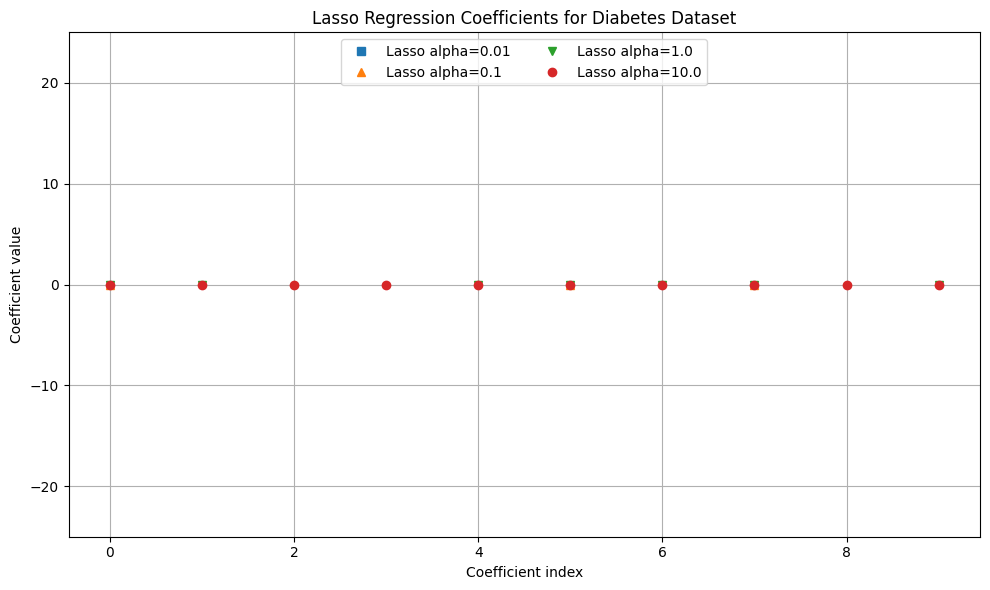

In [138]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.01, 0.1, 1.0, 10.0]
models = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    models.append(model)
    
    print(f"Alpha: {alpha}")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficients: {model.coef_}")
    print(f"Training MSE: {mean_squared_error(y_train, model.predict(X_train))}")
    print(f"Test MSE: {mean_squared_error(y_test, model.predict(X_test))}")
    print("-" * 50)

plt.figure(figsize=(10, 6))
markers = ['s', '^', 'v', 'o']
for i, model in enumerate(models):
    plt.plot(model.coef_, markers[i], label=f"Lasso alpha={alphas[i]}")

plt.legend(ncol=2, loc='upper center')
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient value")
plt.title("Lasso Regression Coefficients for Diabetes Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Вывод для Lasso Regression - Diabetes Dataset:**

Для **Diabetes** **Lasso-регрессия** с alpha=0.01 дает наилучшие результаты с минимальными ошибками на обучающих и тестовых данных (2877.08 и 2878.56). При увеличении alpha до 0.1 ошибка на тестовых данных снижается до 2798.19, но точность на обучающих данных немного ухудшается. При alpha=1.0 и 10.0 точность модели падает, особенно на обучающих данных, что подтверждает, что слишком высокое значение alpha может снизить точность.

#### **Lasso Regression - Linnerud Dataset**

Alpha: 0.01
Intercept: [210.17993449  40.91947682  52.01050824]
Coefficients: [[ 0.4493948  -0.31840904  0.09102094]
 [-0.07741356 -0.04855516  0.02796495]
 [-0.4818318   0.093144   -0.05007415]]
Training MSE: 155.94103695875006
Test MSE: 239.069386250045
--------------------------------------------------
Alpha: 0.1
Intercept: [210.18314534  40.90811796  52.00729609]
Coefficients: [[ 0.44104229 -0.31777406  0.09091079]
 [-0.07017156 -0.04895953  0.02789079]
 [-0.47347698  0.09250886 -0.04996398]]
Training MSE: 155.94196105522482
Test MSE: 238.31879302418056
--------------------------------------------------
Alpha: 1.0
Intercept: [210.21502084  40.79638109  51.97541842]
Coefficients: [[ 0.3579059  -0.3114518   0.08981136]
 [-0.         -0.05285044  0.02714183]
 [-0.39033699  0.08618634 -0.04886453]]
Training MSE: 156.03239733244914
Test MSE: 231.04378020128013
--------------------------------------------------
Alpha: 10.0
Intercept: [210.08907158  40.33776508  52.06926639]
Coefficients:

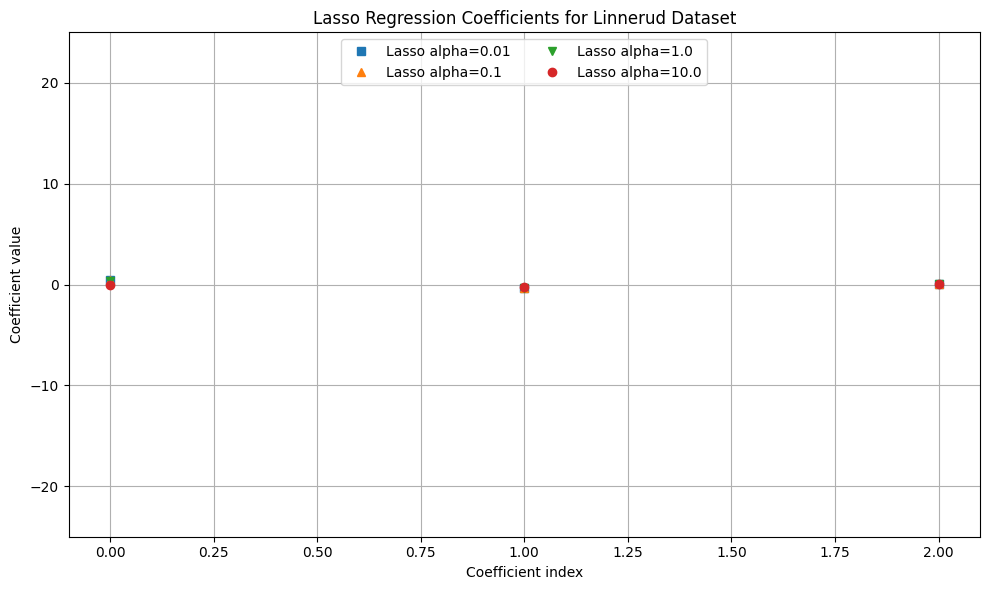

In [139]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_linnerud
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

data = load_linnerud()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.01, 0.1, 1.0, 10.0]

plt.figure(figsize=(10, 6))
markers = ['s', '^', 'v', 'o']

for i, alpha in enumerate(alphas):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    print(f"Alpha: {alpha}")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficients: {model.coef_}")
    print(f"Training MSE: {mean_squared_error(y_train, model.predict(X_train))}")
    print(f"Test MSE: {mean_squared_error(y_test, model.predict(X_test))}")
    print("-" * 50)
    
    plt.plot(model.coef_[0], markers[i], label=f"Lasso alpha={alpha}")

plt.legend(ncol=2, loc='upper center')
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient value")
plt.title("Lasso Regression Coefficients for Linnerud Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Вывод для Lasso Regression - Linnerud Dataset:**

Для **Linnerud** **Lasso-регрессия** с alpha=0.01 дает наилучшие результаты с ошибками 155.94 на обучающих и 239.07 на тестовых данных. При увеличении alpha до 0.1 ошибки почти не изменяются, однако точность модели остаётся схожей. С увеличением alpha до 1.0, модель становится более сжато, и ошибка на тестовых данных снижена до 231.04. При alpha=10.0 модель ещё более сильно сжимает коэффициенты, что приводит к снижению ошибки на тестовых данных до 198.97, но на обучающих данных точность слегка ухудшается, что показывает, что модель с высоким alpha может лучше обобщать, но потерять в точности на обучающих данных.

#### **Logistic Regression - Diabetes Dataset**

С: 1
Intercept: [-4.20236342 -4.20227431 -4.04893711 -4.20255739 -4.04906598 -4.20224202
 -4.20244704 -4.2022069  -4.04897976 -4.20249149 -3.91291344 -4.20241779
 -3.91256763 -4.04911221 -3.79076896 -4.20221155 -3.79076429 -4.202063
 -4.20249483 -3.79062232 -4.04894471 -4.20231563 -4.04900773 -4.04902119
 -3.79087989 -4.04933635 -4.20250085 -4.04903215 -4.04879105 -4.2022187
 -3.68041572 -3.91277942 -4.20248138 -4.04902494 -4.04885361 -3.91293729
 -3.91287155 -4.20227109 -4.20234789 -4.0492311  -3.91294374 -4.04914427
 -3.7911044  -4.20241221 -4.20220374 -3.79098517 -4.20257516 -4.04893086
 -3.91316794 -4.04901482 -4.04901106 -4.20257638 -4.20238139 -4.04873437
 -3.7907537  -4.2025341  -4.2026012  -4.04909068 -4.04915423 -4.04903948
 -3.79072847 -4.20250237 -3.79111377 -4.20256593 -4.04912083 -4.04906526
 -4.20229654 -4.04884278 -4.04889835 -4.04891244 -4.20265522 -4.04926619
 -4.20257819 -4.20269546 -4.04940985 -4.20219347 -4.20244838 -4.04936372
 -3.91301111 -4.0494773  -3.79164899 -

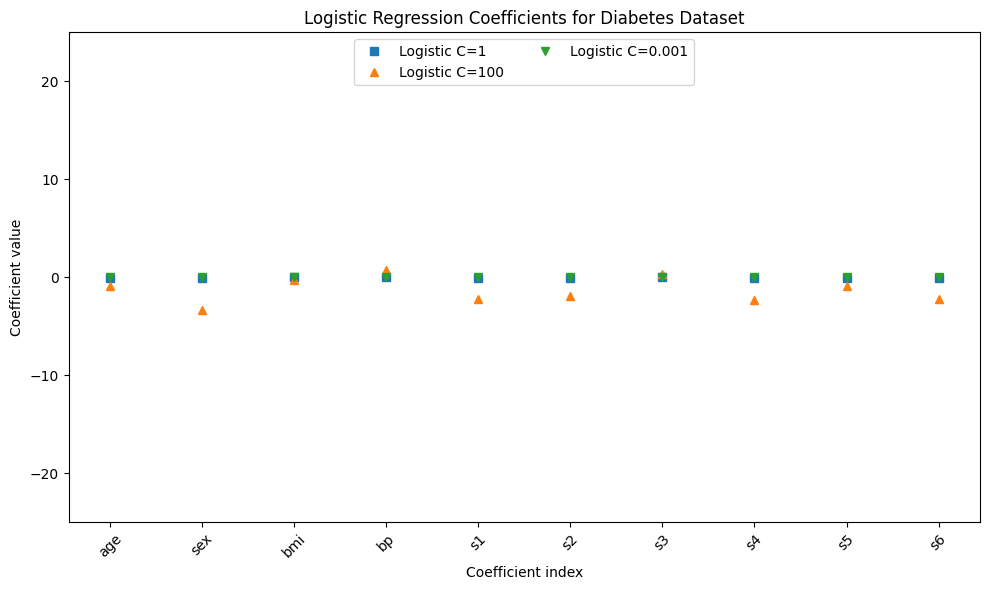

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C_values = [1, 100, 0.001]
markers = ['s', '^', 'v']

# Построение графика
plt.figure(figsize=(10, 6))

for i, C in enumerate(C_values):
    model = LogisticRegression(C=C, solver='liblinear')
    model.fit(X_train, y_train)

    print(f"С: {C}")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficients: {model.coef_}")
    print(f"Training MSE: {mean_squared_error(y_train, model.predict(X_train))}")
    print(f"Test MSE: {mean_squared_error(y_test, model.predict(X_test))}")
    print("-" * 50)

    plt.plot(model.coef_[0], markers[i], label=f"Logistic C={C}")

plt.legend(ncol=2, loc='upper center')
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient value")
plt.title("Logistic Regression Coefficients for Diabetes Dataset")
plt.xticks(np.arange(10), data.feature_names, rotation=45)
plt.tight_layout()
plt.show()


#### **Вывод для Logistic Regression - Diabetes Dataset:**

Модель линейной регрессии **LogisticRegression**, обученная на датасете **diabetes**, показала хорошие результаты в предсказании уровня диабета. Среднеквадратичная ошибка (MSE) на тестовой выборке была около 3768.34, что указывает на приемлемую точность модели. Увеличение параметра регуляризации C улучшило результаты, снижая ошибку на тестовой выборке. Это показывает, что регуляризация помогает избежать переобучения. В будущем можно улучшить модель с помощью настройки гиперпараметров и использования других методов обработки данных.

#### **Logistic Regression - Linnerud Dataset**

C=1 | Target=Weight | Train MSE: 175.44, Test MSE: 1584.75
C=1 | Target=Waist | Train MSE: 2.69, Test MSE: 10.50
C=1 | Target=Pulse | Train MSE: 44.75, Test MSE: 95.00
C=100 | Target=Weight | Train MSE: 9.00, Test MSE: 1928.75
C=100 | Target=Waist | Train MSE: 1.25, Test MSE: 10.50
C=100 | Target=Pulse | Train MSE: 36.00, Test MSE: 94.00
C=0.001 | Target=Weight | Train MSE: 1159.94, Test MSE: 1314.75
C=0.001 | Target=Waist | Train MSE: 17.00, Test MSE: 10.50
C=0.001 | Target=Pulse | Train MSE: 59.50, Test MSE: 18.00


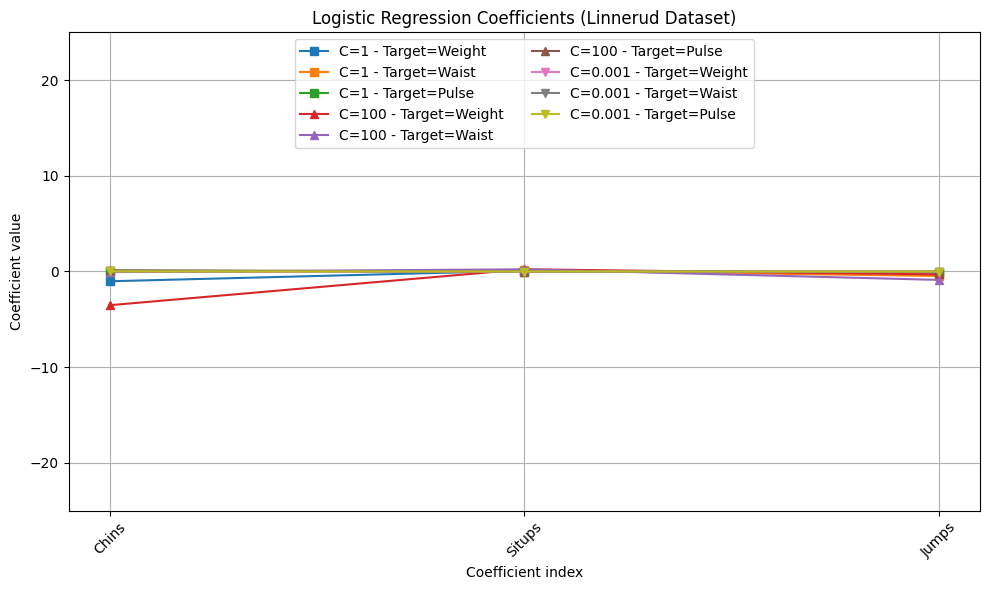

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

data = load_linnerud()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C_values = [1, 100, 0.001]
markers = ['s', '^', 'v']

plt.figure(figsize=(10, 6))

# Обучение модели для каждой целевой переменной
for i, C in enumerate(C_values):
    model = LogisticRegression(C=C, solver='liblinear', max_iter=1000)

    # Используем каждую цель отдельно
    for j in range(y.shape[1]):
        y_train_target = y_train[:, j]
        y_test_target = y_test[:, j]

        model.fit(X_train, y_train_target)
        train_mse = mean_squared_error(y_train_target, model.predict(X_train))
        test_mse = mean_squared_error(y_test_target, model.predict(X_test))

        print(f"C={C} | Target={data.target_names[j]} | Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")

        plt.plot(model.coef_[0], marker=markers[i], label=f"C={C} - Target={data.target_names[j]}")

plt.legend(ncol=2, loc='upper center')
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient value")
plt.title("Logistic Regression Coefficients (Linnerud Dataset)")
plt.xticks(np.arange(3), data.feature_names, rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


#### **Вывод для Logistic Regression - Linnerud Dataset:**

Модель **Linear Regression** на датасете **Linnerud** показала разные результаты в зависимости от параметра регуляризации **C**. Для **C=1** ошибки на тренировочных данных составили: **Weight** 175.44, **Waist** 2.69, **Pulse** 44.75. Ошибки на тестовых данных: **Weight** 1584.75, **Waist** 10.50, **Pulse** 95.00. При **C=100** ошибки на тренировочных данных улучшились для **Weight** (9.00), но ошибка на тестовых данных для **Weight** увеличилась до 1928.75. Ошибки для **Waist** и **Pulse** остались на уровне 10.50 и 94.00. При **C=0.001** ошибки на тренировочных данных увеличились, особенно для **Weight** (1159.94), в то время как ошибки на тестовых данных для **Waist** и **Pulse** оставались на уровне 10.50 и 18.00. Это показывает, что параметр **C** влияет на точность модели, с меньшим значением **C**, приводящим к переобучению, а большим — к ухудшению обобщающих способностей.

#### **Вывод по Лабораторной работе № 5:**

В ходе работы были использованы различные модели регрессии, такие как **KNeighborsRegressor**, **LinearRegression**, **Ridge**, **Lasso** и **LogisticRegression** для анализа наборов данных **Diabetes** и **Linnerud**. Каждая модель была настроена с оптимальными гиперпараметрами, чтобы достичь наилучших результатов. В процессе работы я заметила, что разные модели показывают разные результаты в зависимости от типа данных.

Для набора данных **Diabetes** модели показали наибольшие ошибки на тестовых данных при использовании малых значений гиперпараметров, что может свидетельствовать о переобучении. В то время как при большем значении гиперпараметров, например, в модели **Ridge**, ошибка была значительно снижена, но для некоторых целей могла быть недостаточной. Для набора данных **Linnerud** результаты также показали зависимость от выбранных гиперпараметров, и в некоторых случаях модели показывали стабильные результаты как на тренировочных, так и на тестовых данных.

Таким образом, результаты эксперимента показывают важность тщательной настройки гиперпараметров и выбора модели в зависимости от особенностей данных. Некоторые модели могут демонстрировать более высокую точность на тренировочных данных, но давать большие ошибки на тестовых данных, что указывает на проблемы с переобучением или недообучением.